Part I: Implement Lasso

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load Data

In [4]:
myData = pd.read_csv("Coding2_Data0.csv")
var_names = myData.columns
y = myData[['Y']].to_numpy()
X = myData.drop(['Y'], axis = 1).to_numpy()

In [5]:
X.shape, len(y)

((506, 13), 506)

CD for Lasso

In [9]:
def one_var_lasso(r, x, lam):
    
    #################
    # Your CODE
    #################
    # Ensure r and x are 1D arrays for dot product
    r = r.flatten()  # Convert to 1D array
    x = x.flatten()  # Convert to 1D array
    
    n = len(r)  # Length of the vector r
    b = np.dot(r, x) / np.dot(x, x)  # Computing the initial estimate for b

    # Apply the soft-thresholding rule based on lambda (lam)
    if b > lam / n:
        return b - lam / n
    elif b < -lam / n:
        return b + lam / n
    else:
        return 0

In [10]:
def MyLasso(X, y, lam_seq, maxit = 100):
    
    # Input
    # X: n-by-p design matrix without the intercept 
    # y: n-by-1 response vector 
    # lam.seq: sequence of lambda values (arranged from large to small)
    # maxit: number of updates for each lambda 
    
    # Output
    # B: a (p+1)-by-len(lam.seq) coefficient matrix 
    #    with the first row being the intercept sequence 

  
    n, p = X.shape
    nlam = len(lam_seq)
    B = np.zeros((p+1, nlam))
    
    ##############################
    # YOUR CODE: 
    # (1) newX = Standardizad X; 
    # (2) Record the centers and scales used in (1) 
    ##############################
    centers = np.mean(X, axis=0)
    scales = np.std(X, axis=0, ddof=1)  # Use ddof=1 for sample standard deviation
    newX = (X - centers) / scales  # Standardized X

    # Initilize coef vector b and residual vector r
    b = np.zeros(p)
    r = y

    
    # Triple nested loop
    for m in range(nlam):
        for step in range(maxit):
            for j in range(p):
                X_j = newX[:, j].reshape(-1,1)
                r = r + X_j * b[j]
                b[j] = one_var_lasso(r, X_j, lam_seq[m])
                r = r - X_j * b[j]
        B[1:, m] = b 
    
    ##############################
    # YOUR CODE:
    # Scale back the coefficients;
    # Update the intercepts stored in B[0, ]
    ##############################
    intercepts = np.mean(y) - np.dot(centers, b / scales)  # Calculate the intercept for each lambda
    B[0, :] = intercepts  # Update the first row of B with intercepts
    
    return(B)

In [11]:
log_lam_seq = np.linspace(-1, -8, num = 80)
lam_seq = np.exp(log_lam_seq)
myout = MyLasso(X, y, lam_seq, maxit = 100)

(-8.35, -0.6499999999999999, -0.27519634089335415, 0.0757501111199267)

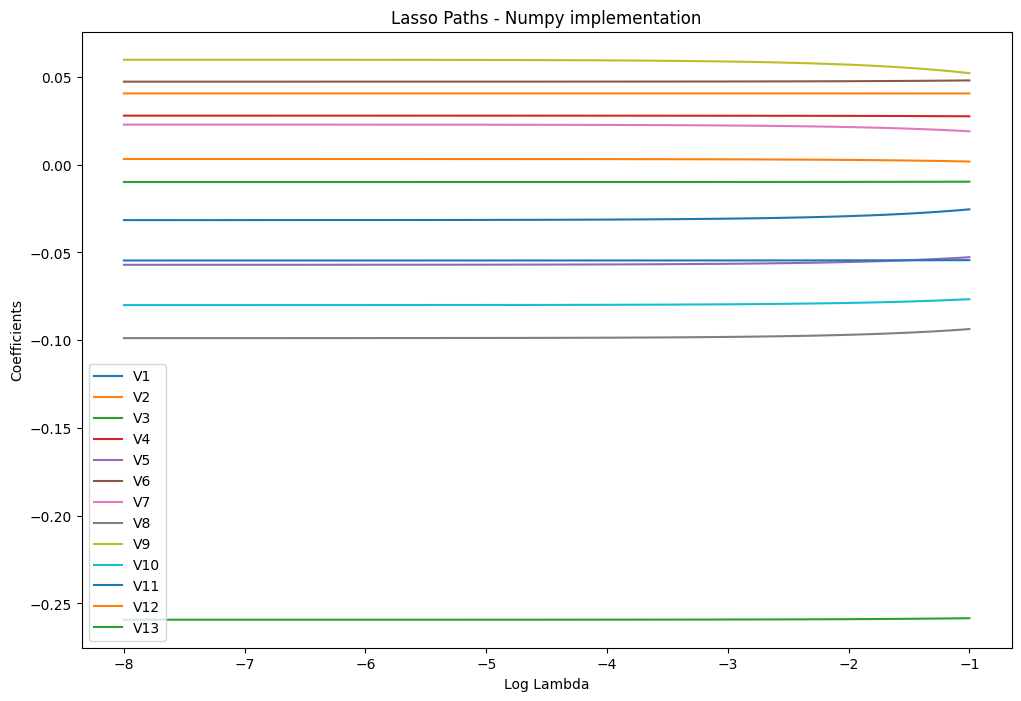

In [12]:
p, _ = myout.shape
plt.figure(figsize = (12,8))

for i in range(p-1):
    plt.plot(log_lam_seq, myout[i+1, :], label = var_names[i])

plt.xlabel('Log Lambda')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')

Check the Accuracy
Compare the accuracy of your algorithm against the output from glmnet. The maximum difference between the two coefficient matrices should be less than 0.005.

In [13]:
lasso_coef = pd.read_csv("Coding2_lasso_coefs.csv").to_numpy()
lasso_coef.shape

(14, 80)

In [14]:
abs(myout - lasso_coef).max()

1.1423250219083467